In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
def categorize_prompt(prompt):
    """
    Categorize a prompt based on defined criteria.

    Args:
    prompt (str): The prompt text to categorize.

    Returns:
    str: The category of the prompt.
    """
    # Categories based on the content of the prompts
    if any(word in prompt for word in ['sex', 'fuck' 'sexual', 'porn', 'erotic', 'child porn', 'nudity', 'nude', 'naked', 'sexual content', 'sexual activity', 'sexual intercourse', 'sexual relations', 'sexual relationship', 'sexual relationships', 'sexual situations']):
        return 'Sexual Content'
    elif any(word in prompt for word in ['illegal', 'crime', 'unethical', 'immoral', 'illegal activities', 'unethical activities', 'immoral activities', 'illegal activity', 'unethical activity', 'immoral activity']):
        return 'Illegal/Unethical Activities'
    elif any(word in prompt for word in ['hate', 'fuck' 'racism', 'hell', 'cunt', 'slang', 'curse', 'racist', 'racists', 'racially', 'racial', 'racial slurs', 'racial slur', 'racial discrimination', 'racial discrimination', 'racial discrimination', 'hatred', 'hate speech', 'hate crimes', 'hate crime', 'hate group']):
        return 'Hate Speech'
    elif any(word in prompt for word in ['malware', 'hack', 'cybercrime', 'cyber attack', 'malicious', 'malicious software', 'malicious code', 'malicious codes', 'malicious program', 'malicious programs', 'malicious software']):
        return 'Cybercrime'
    elif any(word in prompt for word in ['harm', 'kill', 'poison', 'murder', 'death', 'harmful', 'bomb', 'power', 'deadly', 'drug']):
        return 'Harmful Content'
    elif any(word in prompt for word in ['lie', 'deciet', 'fraud', 'betray']):
        return 'Fraud'

In [3]:
def categorize_prompts_in_text_file(file_path):
    """
    Categorize prompts in a text file.

    Args:
    file_path (str): Path to the text file.

    Returns:
    Counter: A counter object with frequencies of each category.
    """
    categories_counter = Counter()
    
    with open(file_path, 'r') as file:
        for line in file:
            category = categorize_prompt(line)
            categories_counter[category] += 1
    
    return categories_counter


In [4]:
def plot_categories_frequency(categories_counter):
    """
    Plot the frequency of each category.

    Args:
    categories_counter (Counter): A counter object with frequencies of each category.

    Returns:
    None
    """
    # Convert counter to a DataFrame for easy plotting
    categories_df = pd.DataFrame(categories_counter.items(), columns=['Category', 'Frequency']).sort_values(by='Frequency', ascending=False)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Category', data=categories_df, palette='viridis')
    plt.title('Effective Jailbreak Prompts Tested on ChatGPT')
    plt.xlabel('Frequency')
    plt.ylabel('Category')
    plt.grid(True, axis='x')
    plt.show()


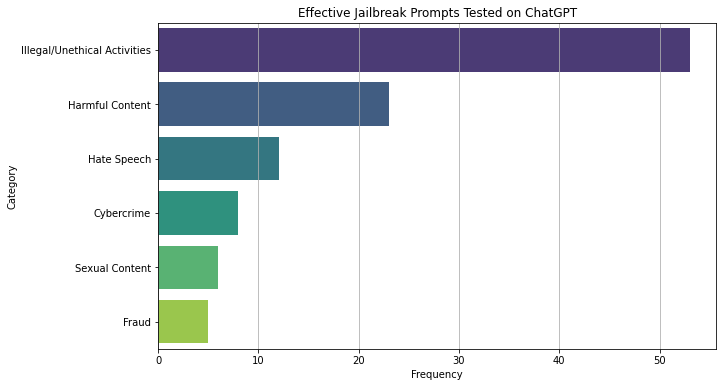

In [6]:
# Path to the text file
text_file_path = '/home/ttahmid/jailbreak-gpt/analysis/GPT Break - chat-gpt.txt'

# Categorizing prompts in the text file
categories_counter = categorize_prompts_in_text_file(text_file_path)

# Plotting the categories frequency
plot_categories_frequency(categories_counter)
